# Movie Recommender System

## Introduction
In this notebook, we will build a movie recommender system using two different approaches: **Content-Based Filtering** and **Collaborative Filtering**. Recommender systems are widely used in various online platforms to suggest items (such as movies, products, or articles) to users based on their preferences and behaviors.

## Dataset
We will be using the **TMDB 5000 Movie Dataset**, which contains information about thousands of movies including their `titles`, `genres`, `cast`, `crew`, `keywords`, and more. This dataset will serve as the basis for our recommendation algorithms.

> ### I. Content-Based Filtering
Content-Based Filtering recommends items similar to those a user has liked in the past. It analyzes the attributes of items and finds items with similar attributes to recommend. In our case, we will use text-based features such as movie genres, cast, crew, and keywords to build a content-based recommender.

> ### II. Collaborative Filtering
Collaborative Filtering recommends items based on the preferences of other users. It assumes that users who have liked similar items in the past will like similar items in the future. We will implement collaborative filtering using the Surprise library, which provides easy-to-use tools for building and evaluating recommendation algorithms.

## Implementation Steps
1. **Data Loading and Preprocessing**: Load the dataset and preprocess it to extract relevant information for building the recommender systems.
2. **Content-Based Filtering**: Build a content-based recommender using text-based features such as movie genres, cast, crew, and keywords. We will use techniques like TF-IDF Vectorization and Cosine Similarity to calculate similarity between movies.
3. **Collaborative Filtering**: Implement collaborative filtering using the Surprise library. We will train a model on user-item ratings data and use it to predict ratings for unseen items. Based on these predictions, we will recommend movies to users.
4. **Evaluation**: Evaluate the performance of both recommendation algorithms using appropriate metrics such as RMSE (Root Mean Squared Error) for collaborative filtering and precision/recall for content-based filtering (if ground truth data is available).
5. **Conclusion**: Summarize the findings and discuss the strengths and limitations of each approach. Provide insights into potential improvements and future work.

Let's Get Started!
Now that we have outlined our plan, let's dive into the implementation and build our movie recommender system.

## Data Preprocessing Stage

We will first include necessary packages and load the datasets into our dataframes first:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import heapq

In [2]:
crux_df = pd.read_csv('./dataset/movies.csv')
meta_df = pd.read_csv('./dataset/credits.csv')

The first dataset expands on the movie details by offering additional insights into various aspects of filmmaking. It encompasses financial aspects like budget allocation and revenue generation, thematic elements such as `genres` and `keywords`, and contextual information such as `release dates`, `production countries`, and audience reception metrics like `popularity` and `average ratings`. This dataset enriches our understanding of movies by providing comprehensive details about their production, thematic content, and reception among audiences.

In contrast, the second dataset provides essential information about movies, including unique identifiers assigned to each film, the names of its **lead and supporting actors**, and the key individuals involved in its production such as **directors**, **editors**, **composers**, and **writers**. This dataset serves as a foundational resource for understanding the composition and personnel behind each movie, facilitating analyses of casting decisions and crew dynamics.

Now, let's peek our data:

In [3]:
crux_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
meta_df.head(5)

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Now, we assign new column names to the `meta_df` dataframe, renaming its columns to `id`, `title`, `cast`, and `crew`. Subsequently, we merge this dataframe with our movies dataframe, `crux_df` based on the `id` column, thereby consolidating additional movie metadata such as title, cast, and crew into the existing dataset. 

In [5]:
crux_df = crux_df.merge(meta_df[['id', 'title', 'cast', 'crew']], on = 'id')

In [6]:
crux_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Exploratory Data Analysis

**Exploratory Data Analysis (EDA)** is a critical step in data analysis that involves exploring and understanding the dataset before diving into more advanced analyses. Through EDA, we can gain insights into the dataset's structure, patterns, and potential issues. By visualizing the data using charts, graphs, and statistical summaries, we can identify trends, **relationships between variables**, and outliers - which can be very important before proceeding with model fitting. EDA also helps in assessing data quality by examining missing values, duplicates, and inconsistencies, allowing us to make informed decisions about data preprocessing.

Moreover, EDA aids in **feature selection and engineering** by identifying relevant features and generating new ones that may improve model performance. It also assists in formulating hypotheses or research questions based on initial observations, guiding further analysis and experimentation. Ultimately, EDA facilitates effective communication of findings to stakeholders, enabling data-driven decision-making and enhancing the overall understanding of the dataset's characteristics and insights.

So, we will proceed with a fair bit of EDA and see how our data looks:

### Distribution of `vote_average`

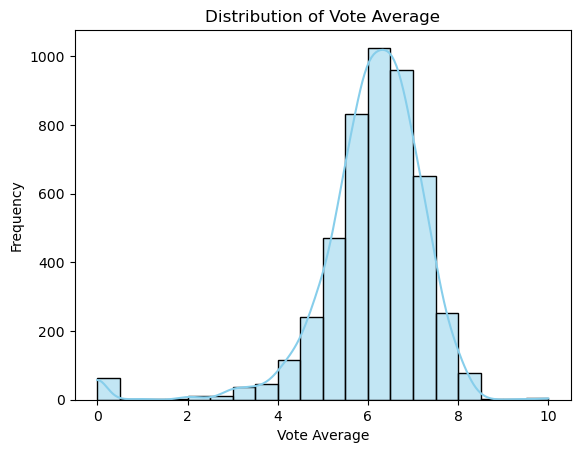

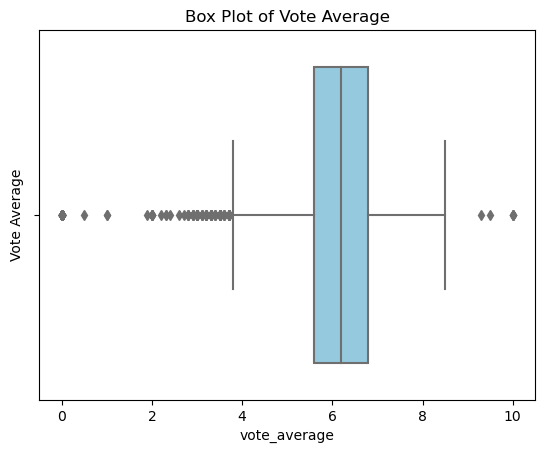

In [7]:
# Plot a histogram for vote_average
sns.histplot(crux_df['vote_average'], bins = 20, kde = True, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Average')
plt.show()

# Plot a box plot for vote_average
sns.boxplot(x = crux_df['vote_average'], color = 'skyblue')
plt.ylabel('Vote Average')
plt.title('Box Plot of Vote Average')
plt.show()

### Distribution of `vote_count`

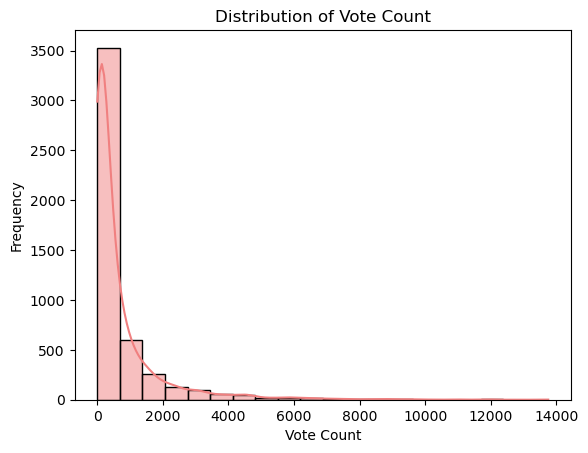

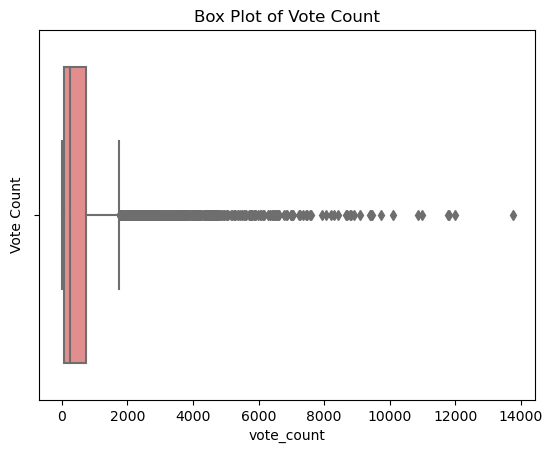

In [8]:
# Plot a histogram for vote_count
sns.histplot(crux_df['vote_count'], bins = 20, kde = True, color = 'lightcoral', edgecolor = 'black')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Count')
plt.show()

# Plot a box plot for vote_count
sns.boxplot(x = crux_df['vote_count'], color = 'lightcoral')
plt.ylabel('Vote Count')
plt.title('Box Plot of Vote Count')
plt.show()

### Distribution of `runtime`

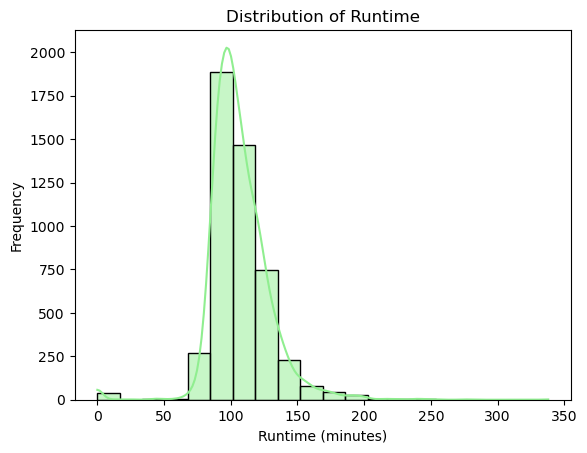

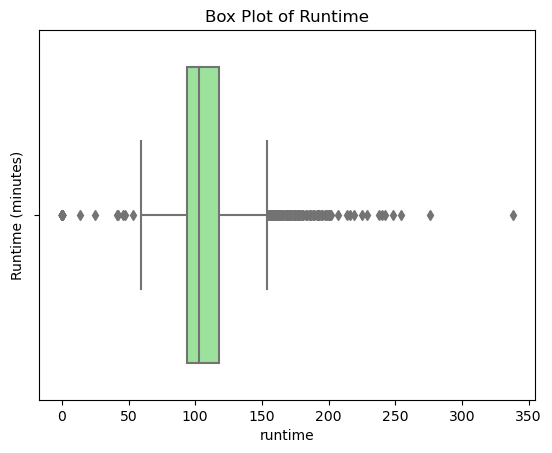

In [9]:
# Plot a histogram for runtime
sns.histplot(crux_df['runtime'], bins = 20, kde = True, color = 'lightgreen', edgecolor = 'black')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Runtime')
plt.show()

# Plot a box plot for runtime
sns.boxplot(x = crux_df['runtime'], color = 'lightgreen')
plt.ylabel('Runtime (minutes)')
plt.title('Box Plot of Runtime')
plt.show()

### Dependency of `budget` with respect to `vote_average`:

First we find the range of the `budget` variable:

In [10]:
min_budget = crux_df['budget'].min()
max_budget = crux_df['budget'].max()

print("Range of budget: {} to {}".format(min_budget, max_budget))

Range of budget: 0 to 380000000


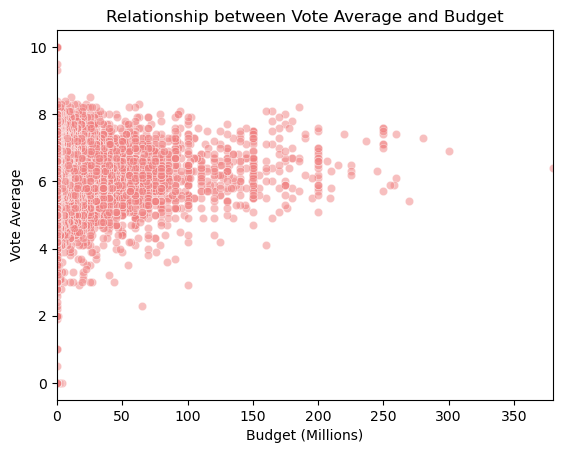

In [11]:
# Convert budget values to millions
crux_df['budget_millions'] = crux_df['budget'] / 1000000

# Plot a scatter plot for vote_average vs. budget in millions
sns.scatterplot(x = crux_df['budget_millions'], y = crux_df['vote_average'], color = 'lightcoral', alpha = 0.5)
plt.xlabel('Budget (Millions)')
plt.ylabel('Vote Average')
plt.title('Relationship between Vote Average and Budget')
plt.xlim(0, 380)  # Set x-axis limits to show values from 0 to 380 million
plt.show()

### Dependency of `budget` with `revenue`:

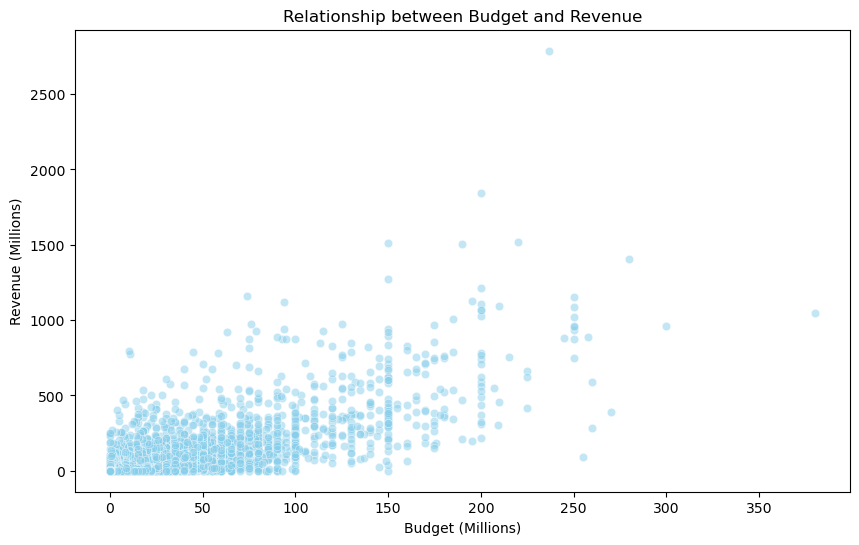

Correlation coefficient between budget and revenue: 0.7308228569244614


In [12]:
crux_df['revenue_millions'] = crux_df['revenue'] / 1000000

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'budget_millions', y = 'revenue_millions', data=crux_df, color='skyblue', alpha=0.5)
plt.xlabel('Budget (Millions)')
plt.ylabel('Revenue (Millions)')
plt.title('Relationship between Budget and Revenue')
plt.show()

# Correlation coefficient between budget and revenue
correlation = crux_df['budget'].corr(crux_df['revenue'])
print("Correlation coefficient between budget and revenue:", correlation)

### Bar Plot of `popularity` by `genre`

> Before we do that, we need to take a look at that `genres` column of ours. There is some processing to be done on that particular column itself, since it seems to be stored in a JSON-like object literal, per record.

In [13]:
crux_df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

> As we can see, the structure is weird, so for that we will write a function that simply extracts the `"name"` value from this JSON-like object literal.

In [14]:
# Custom parsing function to extract genre names
def parse_genres(genres_str):
    # Convert the string to a list of dictionaries using json.loads()
    genres_list = json.loads(genres_str)
    # Extract genre names from each dictionary
    genre_names = [genre['name'] for genre in genres_list]
    return genre_names

In [15]:
crux_df['genres'] = crux_df['genres'].apply(parse_genres)

In [16]:
crux_df['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

> Now that that is done, we need to convert `genres` into a hashable type, and then just plot:

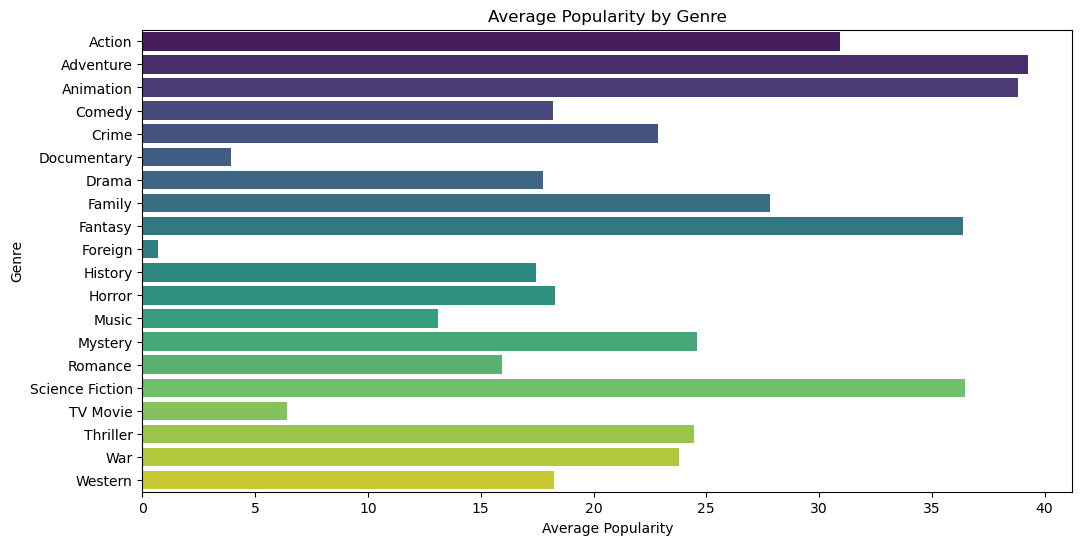

In [17]:
# Explode the 'genres' column in crux_df to have one genre per row
exploded_crux_df = crux_df.explode('genres')

# Calculate the average popularity for each genre
average_popularity_by_genre = exploded_crux_df.groupby('genres')['popularity'].mean().reset_index()

# Plot the average popularity for each genre
plt.figure(figsize = (12, 6))
sns.barplot(x = 'popularity', y = 'genres', data = average_popularity_by_genre, palette = 'viridis')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.title('Average Popularity by Genre')
plt.show()

## I. Content-Based Filtering

There are many way we can apply content-based filtering to the TMDB (The Movie Database) dataset to recommend movies to users based on the characteristics or features of those movies. We are going to do he following to achieve this:

>1. **Item Representation**: Each movie in the TMDB dataset is represented by various features such as genres, keywords, cast (actors), crew (directors, writers), overview (description), popularity, and vote average. These features provide valuable information about the content and characteristics of each movie.

>2. **Feature Extraction**: For content-based filtering, features are extracted from both movies and user profiles. This involves processing and encoding textual and categorical features into numerical representations that can be used for similarity calculations.

>3. **Similarity Calculation**: The system calculates the similarity between movies based on their features. Similarity metrics such as cosine similarity or Euclidean distance can be used to measure the similarity between movies' feature vectors. Movies with higher similarity scores are considered more similar to each other.

>4. **Recommendation Generation**: To generate recommendations for a user, the system identifies movies that are similar to the ones the user has liked or interacted with in the past. It ranks these similar movies based on their similarity scores and presents the top-ranked movies to the user as recommendations.

Using content-based filtering with the TMDB dataset allows for personalized movie recommendations based on the content and characteristics of the movies. By analyzing features such as genres, cast, crew, and descriptions, the system can recommend movies that are similar to the user's preferences and interests. Additionally, content-based filtering can help address the **cold-start problem** by recommending movies based on their features, even for new users or unpopular movies.

#### What we are going to do:
Our recommender system will leverage various attributes of movies, including their `overview`, `keywords`, `crew`,`cast`, and `taglines`, to determine their **`similarity`** with other movies within the dataset. By analyzing these content-based features, the system identifies movies that exhibit **comparable characteristics** and **themes**. Through similarity calculations, such as **cosine similarity** or **Euclidean distance**, the system identifies movies that share common traits, thereby establishing a measure of similarity among them.

Once similarities between movies are established, the system recommends movies to users based on their likelihood of enjoying similar content. Movies that are deemed most similar to those already liked or interacted with by the user are prioritized for recommendation. By utilizing the content of movies rather than relying solely on user-item interactions, this approach addresses the cold-start problem, making recommendations even for new or less popular movies. Additionally, the incorporation of various content attributes allows for a nuanced understanding of movie preferences, enhancing the relevance and accuracy of recommendations provided to users.

### Recommendations based on `overview`
The initial focus is on providing recommendations based on the `overview` of movies dataset. The `overview` serves as a concise summary of the movie's storyline, offering a glimpse into its plot, themes, and narrative style. By analyzing the textual content of overviews, we will identify similarities between movies in terms of their overarching themes, genres, and narrative elements, extracting key features and patterns that enable us to quantify the similarity between movies based on their textual descriptions.

Through this approach, users are recommended movies that share thematic or narrative similarities with those they have previously enjoyed. For example, if a user has expressed interest in science fiction movies with themes of exploration and adventure, the system may recommend other movies with similar thematic elements and narrative arcs. By leveraging the content of movie overviews, the system can provide personalized recommendations that align more closely with the user's preferences and interests. This enhances the overall recommendation experience by offering suggestions that are not only relevant but also reflective of the user's cinematic tastes and preferences.

Let's take a peek at `overview`:

In [18]:
crux_df['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

Since we have to process text, we can transform words from the description into vectors. So for that we will compute **Term Frequency-Inverse Document Frequency (TF-IDF) vectors** for each record in the `overview` column.

Using **TF-IDF vectors** for movie overviews in a recommendation system offers concise numerical representations of textual data. TF-IDF assigns weights to terms based on their importance within the overview and rarity across all movie overviews. This approach reduces dimensionality while preserving semantic information, enabling efficient calculation of thematic similarities between movies. TF-IDF captures the unique characteristics of each movie overview, facilitating accurate and personalized recommendations based on shared thematic elements and narrative themes.

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical representation of a term `t` ina  document `d` within a corpus of documents. It is calculated as the product of two components: **Term Frequency** ($TF_{t,d}$) and **Inverse Document Frequency** ($IDF_{t}$).
 >1. Term Frequency ($TF_{t,d}$) measures the frequency of term `t` in document `d` and is calculated as the ratio of the number of occurrences of term `t` to the total number of terms in document `d`:
 >>  $$(TF_{t,d}) =\frac{T_{o}}{T}$$
 >> where, **$T_{o}$ = number of occurrences of term t in document d,** 
 >> and **T = total number of terms in document d**
   
 >2. Inverse Document Frequency ($IDF_{t}$) measures the rarity of term `t` across all documents in the corpus and is calculated as the logarithm of the ratio of the total number of documents in the corpus to the number of documents containing term `t`:
 >> $$(IDF_{t}) = log(\frac{D}{D_{t}})$$
 >> where, **D = total number of documents in the corpus,** 
 >> and **$D_{t}$ = number of documents containing term t**

We are going to use **`scikit-learn`** for this:

First we initialize a **TF-IDF Vectorizer object**, specifying the removal of English stop words like `the` and `a`. This step ensures that common English words with little semantic meaning are excluded from the TF-IDF calculation. The TF-IDF Vectorizer object will then be ready to be used for further text processing tasks.

In [19]:
tfidf_crux_obj = TfidfVectorizer(stop_words = 'english')

Next, we need to replace missing values (`NaN`) in the `overview` column with an empty string to ensure consistent data handling during text processing. This step prepares the data for subsequent transformation without encountering issues related to missing values. After this operation, all entries in the `overview` column will be valid strings, facilitating further text processing tasks.

In [20]:
crux_df['overview'] = crux_df['overview'].fillna('')

In [21]:
# check the overview:
crux_df['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

It seems as if there were no `NaN` values present. But in case there were, we can easily replace them using the previous step we did. 

Next, we construct the TF-IDF matrix (`tfidf_crux_mat`) by fitting and transforming the text data using the initialized TF-IDF Vectorizer object (`tfidf_crux_obj`). This process calculates the TF-IDF weights for each term in the text corpus, generating a matrix representation where rows correspond to documents and columns correspond to unique terms in the corpus. By fitting the data, the TF-IDF Vectorizer learns the vocabulary and computes the IDF weights, while transforming the data converts the text documents into TF-IDF vectors.

In [22]:
tfidf_crux_mat = tfidf_crux_obj.fit_transform(crux_df['overview'])

In [23]:
# now we just check its shape:
tfidf_crux_mat.shape

(4803, 20978)

We can see that the resulting TF-IDF matrix has a shape of **(4803, 20978)**, indicating that there are **4803 documents (or movie overviews)** in the dataset and **20978 unique terms (or features)** in the TF-IDF representation. Each document is represented as a vector in a high-dimensional space defined by these unique terms, with each dimension corresponding to a specific term's TF-IDF weight. This matrix captures the semantic content of the movie overviews in a numerical format suitable for machine learning algorithms.

Having obtained this matrix now, we can proceed to calculate a **similarity score**. In our case, we go for the **cosine similarity** to quantify the similarity between two movies due to its magnitude-independence and computational efficiency, making it a practical choice for our purposes.
![Cosine Similarity](imgs/cos_sim.png)

In [24]:
# Computing the matrix:
cos_sim_crux = linear_kernel(tfidf_crux_mat, tfidf_crux_mat)

In [25]:
# We can see the vector by just printing it out:
print(cos_sim_crux)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.02160533 0.         0.        ]
 [0.         0.         1.         ... 0.01488159 0.         0.        ]
 ...
 [0.         0.02160533 0.01488159 ... 1.         0.01609091 0.00701914]
 [0.         0.         0.         ... 0.01609091 1.         0.01171696]
 [0.         0.         0.         ... 0.00701914 0.01171696 1.        ]]


Now, for generating a list of the **10 most similar movies** based on a given movie `title`, we'll define a function. However, to do this, we require a reverse mapping mechanism that associates movie titles with the frame indices. This mechanism allows us to identify the index of a movie in our metadata using its `title`.

In [26]:
crux_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,budget_millions,revenue_millions
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237.0,2787.965087
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300.0,961.000000
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245.0,880.674609
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250.0,1084.939099
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260.0,284.139100


In [27]:
crux_df.rename(columns = {'title_x': 'title'}, inplace = True)

In [28]:
frame_ind = pd.Series(crux_df.index, index = crux_df['title']).drop_duplicates()

In [29]:
def top_10_recommendations(title, cos_sim_crux = cos_sim_crux):
    # Get the index of the input movie title
    index = frame_ind.get(title)
    
    # Check if the movie title exists in the index mapping
    if index is None:
        print("Movie not found.")
        return
    
    # Calculate the cosine similarity scores for the input movie
    cos_sim_scores = list(enumerate(cos_sim_crux[index]))
    
    # Find the top 10 most similar movies based on cosine similarity scores
    top_sim_scores = heapq.nlargest(11, cos_sim_scores, key = lambda x: x[1])
    
    # Extract the indices of the recommended movies
    movie_indices = [i[0] for i in top_sim_scores]
    
    # Extract the titles of the recommended movies, excluding the input movie itself
    recommended_movies = crux_df.iloc[movie_indices]['title'][1:]
    
    return recommended_movies

In [30]:
top_10_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

### Recommendations based on `genres`, `keywords`, and `credits`
To generate recommendations based on `genres`, `keywords`, and `credits`, we can create separate recommendation functions for each feature and then combine their results. Here's a high-level overview of the process:

1. **Recommendations based on Genres**: We'll create a function that takes a movie title as input, identifies its genre(s), and then retrieves movies with similar genres.

2. **Recommendations based on Keywords**: Similarly, we'll create a function to find movies with similar keywords or tags.

3. **Recommendations based on Credits**: This function will consider the cast and crew of a movie and recommend other movies involving the same actors or directed by the same director.

4. **Combining Recommendations**: Finally, we'll combine the recommendations from the three functions to provide a comprehensive list of movie recommendations based on genres, keywords, and credits.

We'll create a combined **soup** feature that includes information from `genres`, `keywords`, `cast`, and `crew` columns. Then, we'll use this **soup** feature to generate recommendations:

>- Create the Soup Feature: We'll concatenate the information from genres, keywords, cast, and crew columns into a single soup feature for each movie.
>- TF-IDF Vectorization: We'll use TF-IDF vectorization to convert the soup feature into numerical vectors.
>- Calculate Similarity: With the TF-IDF vectors, we can calculate the cosine similarity between movies based on their soup features.
>- Generate Recommendations: Finally, we'll create a function that takes a movie title as input, calculates the similarity scores between the input movie and all other movies, and returns a list of recommended movies sorted by similarity scores.

First, we reload and clean the data so that it is parsable:

In [31]:
crux_df = pd.read_csv('./dataset/movies.csv')
meta_df = pd.read_csv('./dataset/credits.csv')

crux_df = crux_df.merge(meta_df[['id', 'title', 'cast', 'crew']], on = 'id')
crux_df.rename(columns = {'title_x': 'title'}, inplace=True)

In [32]:
meta_features = ['cast', 'crew', 'keywords', 'genres']
for feature in meta_features:
    crux_df[feature] = crux_df[feature].apply(json.loads)

In [33]:
crux_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [34]:
def extract_director(movie):
    for crew_member in movie:
        if crew_member['job'] == 'Director':
            return crew_member['name']
    return np.nan

In [35]:
crux_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [36]:
crux_df['director'] = crux_df['crew'].apply(extract_director)

In [37]:
crux_df['director']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

In [38]:
def extract_features(entry):
    if isinstance(entry, list):
        names = [idx['name'] for idx in entry]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [39]:
concise_features = ['cast', 'keywords', 'genres']
for feature in concise_features:
    crux_df[feature] = crux_df[feature].apply(extract_features)

In [40]:
crux_df[['title', 'cast', 'director', 'keywords', 'genres']]

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
...,...,...,...,...,...
4798,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez,"[united states–mexico barrier, legs, arms]","[Action, Crime, Thriller]"
4799,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",Edward Burns,[],"[Comedy, Romance]"
4800,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe]",Scott Smith,"[date, love at first sight, narration]","[Comedy, Drama, Romance]"
4801,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton]",Daniel Hsia,[],[]


Now that our data is clean and concise, we can start with the filtering!

For that, first, we need to tokenize our instances of keys so that they can be transformed into vectors.

In [41]:
def tokenize(entry):
    if isinstance(entry, list):
        return [str.lower(i.replace(" ", "")) for i in entry]
    elif isinstance(entry, str):
        return str.lower(entry.replace(" ", ""))
    else:
        return ''

In [42]:
vec_features = ['cast', 'keywords', 'director', 'genres']

for feature in vec_features:
    crux_df[feature] = crux_df[feature].apply(tokenize)

In [43]:
crux_df[['title', 'cast', 'director', 'keywords', 'genres']]

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",christophernolan,"[dccomics, crimefighter, terrorist]","[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",andrewstanton,"[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]"
...,...,...,...,...,...
4798,El Mariachi,"[carlosgallardo, jaimedehoyos, petermarquardt]",robertrodriguez,"[unitedstates–mexicobarrier, legs, arms]","[action, crime, thriller]"
4799,Newlyweds,"[edwardburns, kerrybishé, marshadietlein]",edwardburns,[],"[comedy, romance]"
4800,"Signed, Sealed, Delivered","[ericmabius, kristinbooth, crystallowe]",scottsmith,"[date, loveatfirstsight, narration]","[comedy, drama, romance]"
4801,Shanghai Calling,"[danielhenney, elizacoupe, billpaxton]",danielhsia,[],[]


Now we have our tokens!

Next, we create a soup of all of our tokens from the metadata (tokens from actors, directors and the keywords). A soup in nothing but a mish-mash of all the tokens created into one beautiful string.

In [44]:
def boil_soup(entry):
    # double, double toil and trouble!
    return ' '.join(entry['keywords']) + ' ' + ' '.join(entry['cast']) + ' ' + entry['director'] + ' ' + ' '.join(entry['genres'])

In [45]:
# now we apply it:
crux_df['soup'] = crux_df.apply(boil_soup, axis = 1)

In [46]:
# Initialize CountVectorizer with English stop words
vec_count = CountVectorizer(stop_words='english')

# Fit and transform the 'soup' column of crux_df using CountVectorizer
count_mat = vec_count.fit_transform(crux_df['soup'])

# Calculate cosine similarity matrix using count_mat
cos_sim_mat2 = cosine_similarity(count_mat, count_mat)

In [47]:
# Reset index of crux_df
crux_df = crux_df.reset_index()

# Create a Series where the index is the 'title' column of crux_df 
# and the values are the corresponding indices of the DataFrame
frame_indices2 = pd.Series(crux_df.index, index=crux_df['title'])

In [48]:
top_10_recommendations('Avatar', cos_sim_mat2)

206                         Clash of the Titans
71        The Mummy: Tomb of the Dragon Emperor
786                           The Monkey King 2
103                   The Sorcerer's Apprentice
131                                     G-Force
215      Fantastic 4: Rise of the Silver Surfer
466                            The Time Machine
715                           The Scorpion King
1      Pirates of the Caribbean: At World's End
5                                  Spider-Man 3
Name: title, dtype: object

In conclusion, the implementation of **content-based filtering** for recommendations has showcased a multifaceted approach in catering to diverse user preferences. By incorporating `genres`, `keywords`, and `credits`, alongside `overview`-based recommendations, the system ensures a comprehensive exploration of content affinity. This methodology not only enhances user satisfaction by offering personalized suggestions but also demonstrates the system's adaptability in capturing nuanced content characteristics. Moving forward, continued refinement and integration of these filtering techniques promise to elevate the user experience, fostering deeper engagement and loyalty within the platform.